Devoir proba stats

Phase 1 : Analyse statistique descriptive et inférence

a) 
- Histogramme et diagramme de Tukey

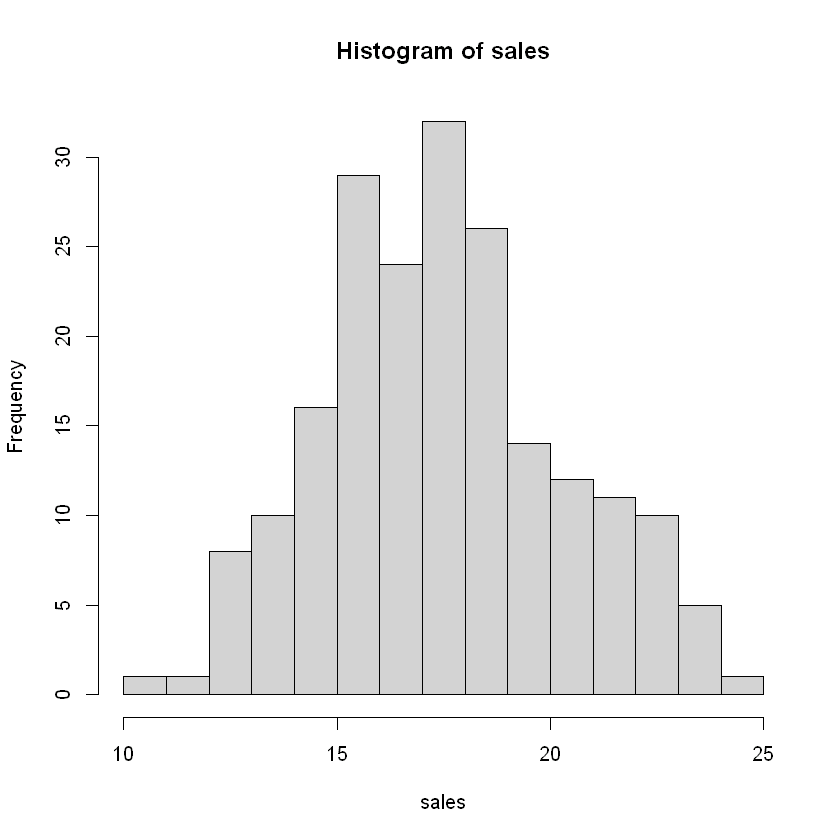

In [18]:
charger <- function(matricule) {
  set.seed(matricule)
  mondata <- read.csv2("DevoirD_A24.csv")[sample(288,200),]
}

data <- charger(2247399)


sales <- data[, 1]
hist(sales, xlim=c(10, 25), breaks = c(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25))

L'histogramme ci-dessus a 14 intervalles de largeur de 1 chaque. Cet histogramme représente le nombre de ventes en termes de milliers et le nombre de fois que ce nombre a été dans un certain intervalle. Par exemple, pour l'intervalle [15,16], il y a presque 30 résultats dans cet intervalle.

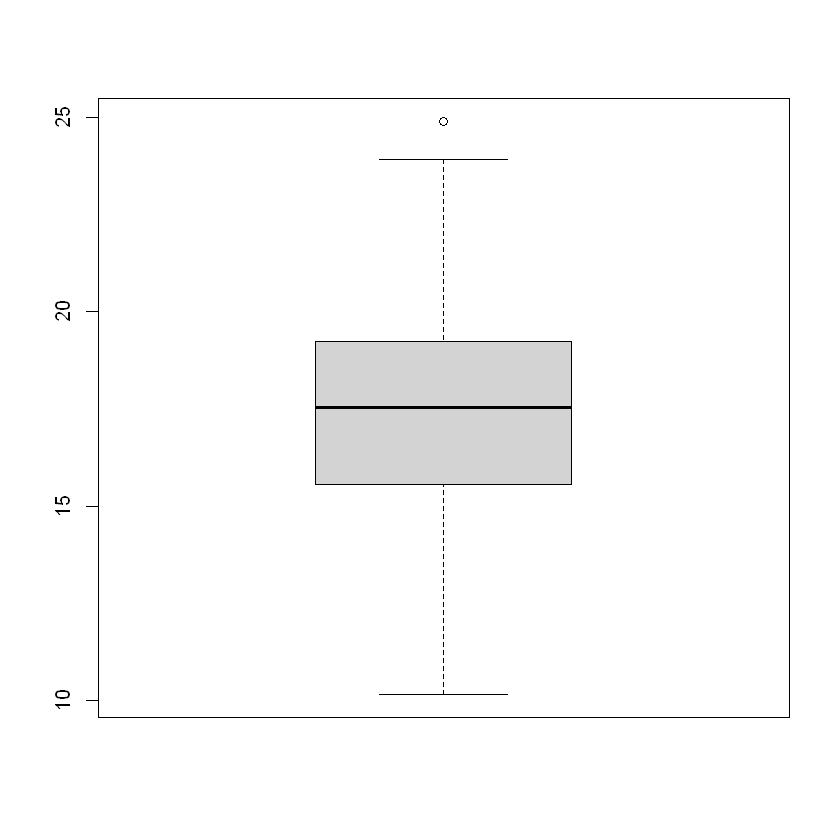

In [4]:
boxplot(sales)

Dans le boxplot ci-dessus, le centre de la boîte est Q2 (le quartile à 50%), l'extrémité d'en haut de la bôite est Q3 (75%) et le bas de la boîte est Q1(25%). Q2 est aussi la médiane pour les ventes, donc, nous avons 50% des ventes ce trouvant dans la boître, autrement dit, 50% des ventes se situent entre environ 15 000 et moins que 20 000.

- Droite de Henry (normal probability plot) et test de Normalité (Shapiro-Wilk)

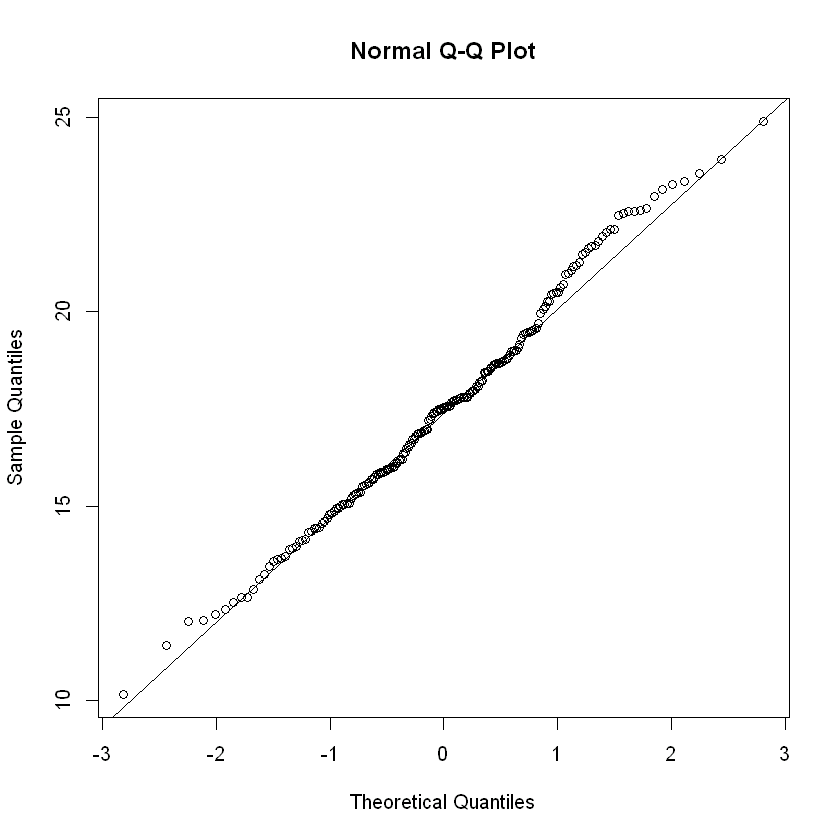

In [5]:
qqnorm(sales)
qqline(sales)

La droite de Henry est utilisé pour déterminer à quel point un ensemble de données est distribué normalement, plus la ligne est droite, mieux c'est, plus les données sont bien distribuées.

In [6]:
shapiro.test(sales)


	Shapiro-Wilk normality test

data:  sales
W = 0.99193, p-value = 0.3342


Avec le test de Shapiro-Wilk, nous avons la valeur utilisée pour évaluer la distribution des données, plus cette valeur est proche de 1, plus les données sont distribuées de façon normale. Dans ce cas-là, la valeur est extrêment proche de 1, donc, les données sont très bien distribuées.
- Tableau de statistiques avec : moyenne, quartiles, écart type, intervalle de confiance pour la moyenne

In [7]:
moyenne <- mean(sales)
variance <- var(sales)
q1 <- quantile(sales, 0.25)
q2 <- quantile(sales, 0.5)
q3 <- quantile(sales, 0.75)
ecart_type <- sd(sales)

standard_error_mean <- ecart_type/sqrt(200)
alpha <- 0.05
degres <- 199
t <- qt(p=alpha/2, df=degres, lower.tail=F)
margin_error <- t * standard_error_mean
lower_bound <- moyenne - margin_error
upper_bound <- moyenne + margin_error

table <- as.table(rbind(c(moyenne, variance, q1, q2, q3, ecart_type, lower_bound, upper_bound)))
dimnames(table) <- list(Valeurs = c(""), Attributs = c("Moyenne", "Variance", "Q1", "Q2", "Q3", "Ecart-type", "Borne inférieure", "Borne supérieure"))

table

       Attributs
Valeurs   Moyenne  Variance        Q1        Q2        Q3 Ecart-type
        17.531850  7.931492 15.575000 17.535000 19.200000   2.816290
       Attributs
Valeurs Borne inférieure Borne supérieure
               17.139151        17.924549

La table ci-dessus montre que la valeur minimale est un peu moins de 10 et la valeur maximale est proche de 25, ces valeurs sont calculées avec la moyenne et la variance, en soustrayant/additionnant la variance à la moyenne.

b) 
- Deux histogrammes et deux boxplot

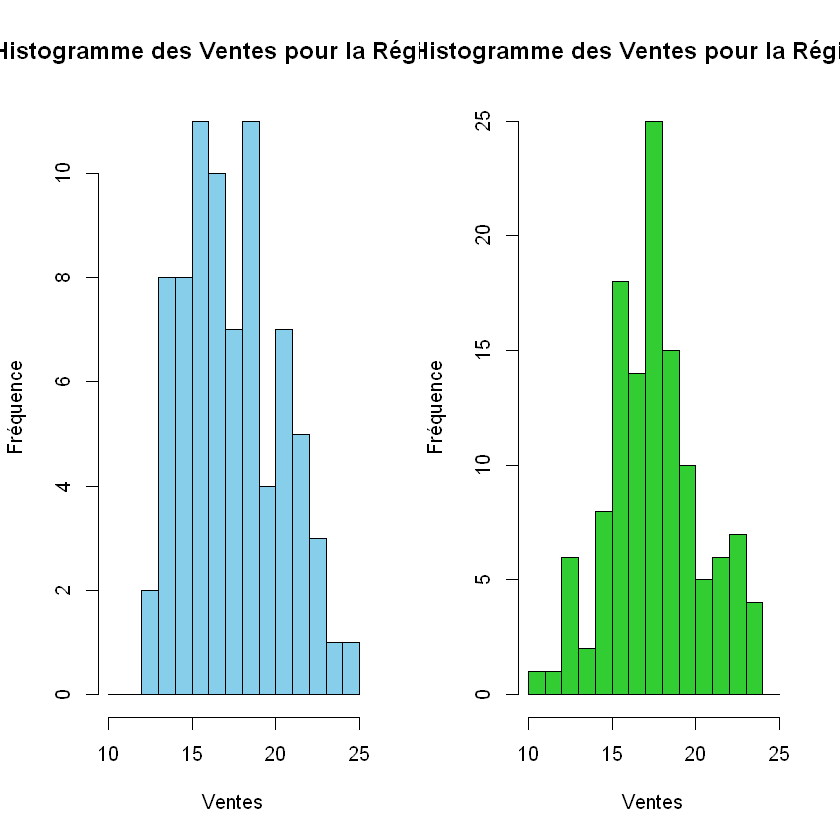

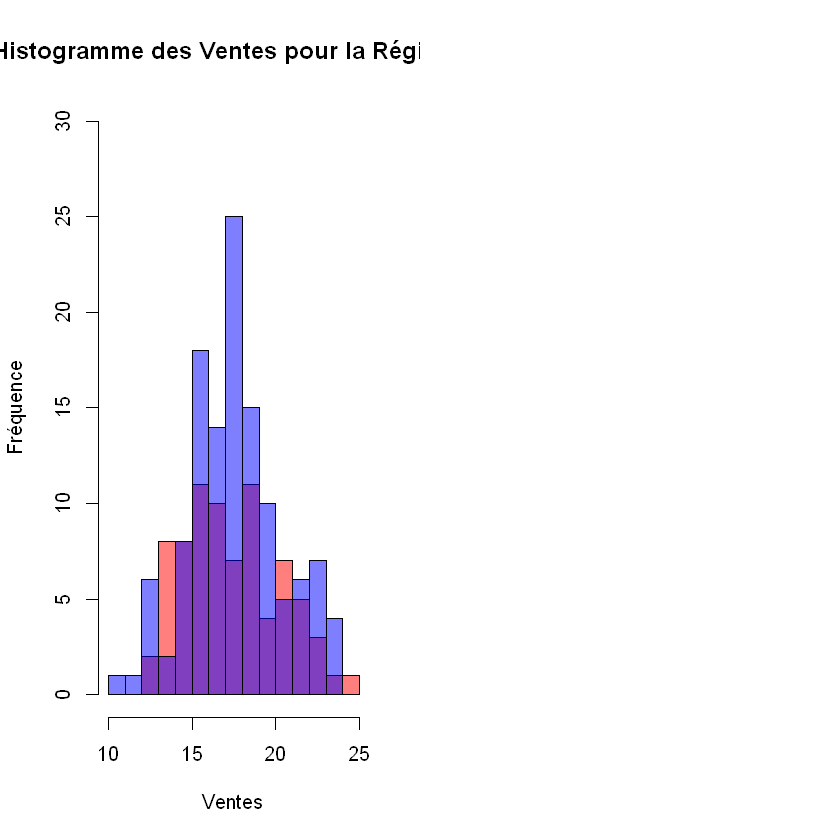

In [8]:
par(mfrow = c(1, 2))
region0_sales <- subset(data, Region == 0)$Sales
hist(region0_sales, 
     xlim = c(10, 25), 
     breaks = c(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25), 
     main = "Histogramme des Ventes pour la Région 0", 
     xlab = "Ventes", 
     ylab = "Fréquence", 
     col = "skyblue", 
     border = "black")
region1_sales <- subset(data, Region == 1)$Sales
hist(region1_sales, 
     xlim = c(10, 25), 
     breaks = c(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25), 
     main = "Histogramme des Ventes pour la Région 1", 
     xlab = "Ventes", 
     ylab = "Fréquence", 
     col = "limegreen", 
     border = "black")
hist(region0_sales,
    main = "Histogramme des Ventes pour la Région 0",
    breaks = c(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25),
     col = rgb(1, 0, 0, 0.5), 
     xlab = "Ventes",
     ylab = "Fréquence", 
     xlim = c(10, 25),
     ylim = c(0,30))
#
#  Add male histogram
hist(region1_sales, col = rgb(0, 0, 1, 0.5),
breaks = c(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25),
 add = TRUE)


On peut voir ci-dessous que les ventes issues de la région 1 sont plus fréquents que les ventes issues de la région 0.

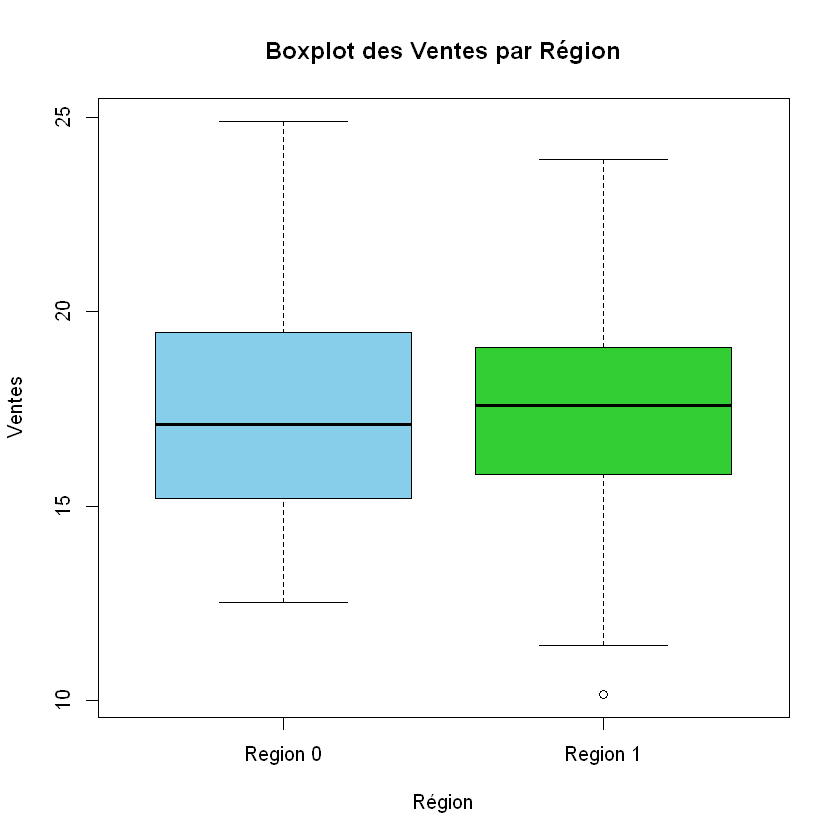

In [9]:
boxplot(region0_sales,
 region1_sales,
  names = c("Region 0", "Region 1"),
   col = c("skyblue", "limegreen"),
 main = "Boxplot des Ventes par Région",
  ylab = "Ventes",
   xlab = "Région")

La région 0 possède une plus grande valeur maximale que la région 1, tandis que la région 1 possède une plus petite valeur minimale que la région 0. Leurs médiannes semblent être similaire, alors ces boxplots sont comparables. Le IQR de la région 0 est plus grand que celui de la région 1.
La région 0 possède une asymétrie positive, alors ses données sont asymétriques vers la gauche (en bas), tandis que la région 1 possède une asymétrie négative, donc ses données sont asymétrique vers la droite (en haut).
La région 0 possède un boxplot plus grand que le boxplot de la région 1, ce qui indique une plus grande variabilité, tandis que, pour la région 1, cela indique que les données sont un peu plus constantes.
La région 0 possède aussi un plus long whisker, alors ces données sont plus dispersés que la région 1.

In [10]:
r0moyenne <- mean(region0_sales)
r0variance <- var(region0_sales)
r0q1 <- quantile(region0_sales, 0.25)
r0q2 <- quantile(region0_sales, 0.5)
r0q3 <- quantile(region0_sales, 0.75)
r0ecart_type <- sd(region0_sales)

r0standard_error_mean <- r0ecart_type/sqrt(200)
alpha <- 0.05
degres <- 199
t <- qt(p=alpha/2, df=degres, lower.tail=F)
r0margin_error <- t * r0standard_error_mean
r0lower_bound <- r0moyenne - r0margin_error
r0upper_bound <- r0moyenne + r0margin_error

resultats <- c(r0moyenne, r0variance, r0q1, r0q2, r0q3, r0ecart_type, r0lower_bound, r0upper_bound)
attributs <- c("Moyenne", "Variance", "Q1", "Q2", "Q3", "Ecart-type", "Borne inférieure", "Borne supérieure")
table0 <- as.table(rbind(resultats))
dimnames(table0) <- list(Valeurs = c(""), Attributs = attributs)
table0

       Attributs
Valeurs   Moyenne  Variance        Q1        Q2        Q3 Ecart-type
        17.421154  8.118860 15.225000 17.100000 19.385000   2.849361
       Attributs
Valeurs Borne inférieure Borne supérieure
               17.023844        17.818464

La table ci-dessus nous montre la moyenne, la vairance, les quartiles, l'écart-type et l'intervalle de confiance de la région 0.
Nous pouvons observer que la moyenne (17.421154) et la médianne (17.1) sont proches, suggérant ainsi une disbrution des données de la région 0 plutôt symétrique.
On observe un IQR de 4.16 (Q3 - Q1) et un intervalle de moyenne ± écart-type d'approxivement [14.57, 19.27]. Cela nous montre que la majorité des données sont à l'entour de ces écarts.
Puis, l'intervalle de confiance [17.02, 17.82] montre qu'il y a une forte probabilité que la moyenne réelle des données se situe dans cette intervalle.

In [11]:
r1moyenne <- mean(region1_sales)
r1variance <- var(region1_sales)
r1q1 <- quantile(region1_sales, 0.25)
r1q2 <- quantile(region1_sales, 0.5)
r1q3 <- quantile(region1_sales, 0.75)
r1ecart_type <- sd(region1_sales)

r1standard_error_mean <- r1ecart_type/sqrt(200)
alpha <- 0.05
degres <- 199
t <- qt(p=alpha/2, df=degres, lower.tail=F)
r1margin_error <- t * r1standard_error_mean
r1lower_bound <- r1moyenne - r1margin_error
r1upper_bound <- r1moyenne + r1margin_error

resultats <- c(r1moyenne, r1variance, r1q1, r1q2, r1q3, r1ecart_type, r1lower_bound, r1upper_bound)
attributs <- c("Moyenne", "Variance", "Q1", "Q2", "Q3", "Ecart-type", "Borne inférieure", "Borne supérieure")
table1 <- as.table(rbind(resultats))
dimnames(table1) <- list(Valeurs = c(""), Attributs = attributs)
table1

       Attributs
Valeurs   Moyenne  Variance        Q1        Q2        Q3 Ecart-type
        17.602623  7.864858 15.822500 17.590000 19.062500   2.804435
       Attributs
Valeurs Borne inférieure Borne supérieure
               17.211577        17.993669

La table ci-dessus nous montre la moyenne, la variance, les quartiles, l'écart-type et l'intervalle de confiance de la région 1.
Nous pouvons observer que la moyenne (17.602623) et la médianne (17.56) sont proches, suggérant ainsi une disbrution des données de la région 1 plutôt symétrique.
On observe un IQR de 3,24 (Q3 - Q1) et un intervalle de moyenne ± écart-type d'approxivement [14.80, 20.41]. Cela nous montre que la majorité des données sont à l'entour de ces écarts.
Puis, l'intervalle de confiance [17.21, 17.99] montre qu'il y a une forte probabilité que la moyenne réelle des données se situe dans cette intervalle.

In [12]:
F_statistic <- r0variance/r1variance
F_statistic
var.test(region0_sales, region1_sales)

[1] 1.032296


	F test to compare two variances

data:  region0_sales and region1_sales
F = 1.0323, num df = 77, denom df = 121, p-value = 0.8656
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6938214 1.5647000
sample estimates:
ratio of variances 
          1.032296 


Tests d'Hypothèse
Hypothèse nulle (H0): σ0^2=σ1^2
​Hypothèse alternative (H1): σ0^2=/=σ1^2

La statistique F nous montre que la variance de la région 0 est légérement supérieure à celle de la région 1 (F_statistic = r0variance/r1variance).
La valeur p de 0.8656 est élevé, ce qui indique qu'on ne devrait pas rejeter l'hypothèse nulle
Avec l'intervalle de confiance de 95% [0.6938, 1.5647], on peut déduire que les variances sont possiblement égales, car 1 est inclut dans l'intervalle.

In [13]:
t.test(region0_sales, region1_sales, var.equal = FALSE)


	Welch Two Sample t-test

data:  region0_sales and region1_sales
t = -0.44201, df = 162.3, p-value = 0.6591
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9921839  0.6292457
sample estimates:
mean of x mean of y 
 17.42115  17.60262 


Tests d'Hypothèse
Hypothèse nulle (H0):μ0^2=𝜇1^2
​Hypothèse alternative (H1): 𝜇0^2=/=𝜇1^2

La statisque t est faible, ce qui montre que les moyennes des deux régions sont proches.
La valeur p est aussi élevé et bien au-dessus du seuil (α=0.05), alors on ne peut pas rejeter l'hypothèse nulle. 
Une intervalle de confiance (95 %) de [−0.9922, 0.6292] inclut la valeur 0, ce qui rend possible que la différence des moyennes soit nulle.

Phase 2 : Recherche d'un meilleur modèle
c) 
- Modèle 1
Tableau des coefficients de régression et tableau d'analyse de la variance

Y = Ventes, variable dépendante

X1 = Prix

In [39]:
modele1 <- lm(Sales ~ Price, data = data)

b) Signification du modèle:
    Nous pouvons regarder la p-value du modèle et la valeur de R^2 pour conclure sur la signification du modèle.


In [49]:
summary(modele1)


Call:
lm(formula = Sales ~ Price, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5915 -1.9070  0.0733  1.8436  5.6340 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.819254   0.988581   24.09  < 2e-16 ***
Price       -0.053775   0.008312   -6.47 7.53e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.565 on 198 degrees of freedom
Multiple R-squared:  0.1745,	Adjusted R-squared:  0.1703 
F-statistic: 41.86 on 1 and 198 DF,  p-value: 7.526e-10


Dans ce cas, p-value = 7.526 * 10^-6 et R^2 = 0.1745. 

En commençant avec la p-value, puisqu'elle est extrêment petite, ceci nous amène à croire que le modèle est significatif, mais nous ne savons pas encore la proportion des valeurs qui sont expliquées par ce modèle.

Dans le cas de R^2, puisque la valeur est beaucoup plus proche de 0 que 1, nous pouvons conclure que le modèle, bien que significatif, ne représente correctement qu'une petite partie des données.

Ensuite, analyse des résidus avec leur normalité, leur homoscédasticité et points atypiques.

- Normalité

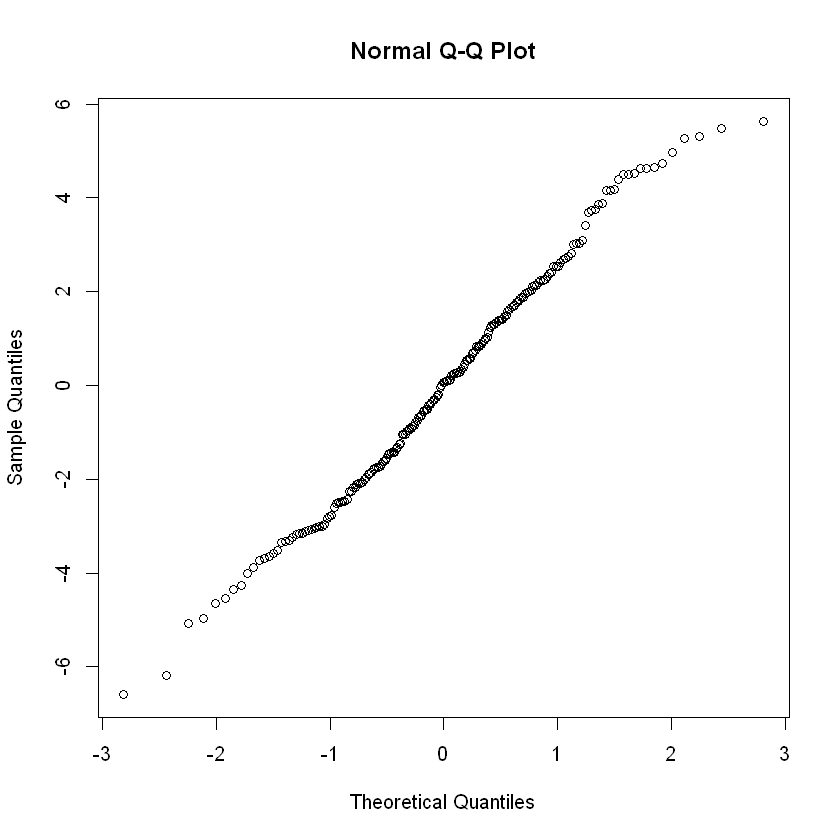

In [71]:
residusModele1 <- residuals(modele1)
qqnorm(residusModele1)

Comme nous pouvons le voir avec le graphique ci-dessus, la majorité des résidus sont bien distribués, car ils se trouvent pour la plupart sur la droite et non complètement à côté.

- Homoscédasticité

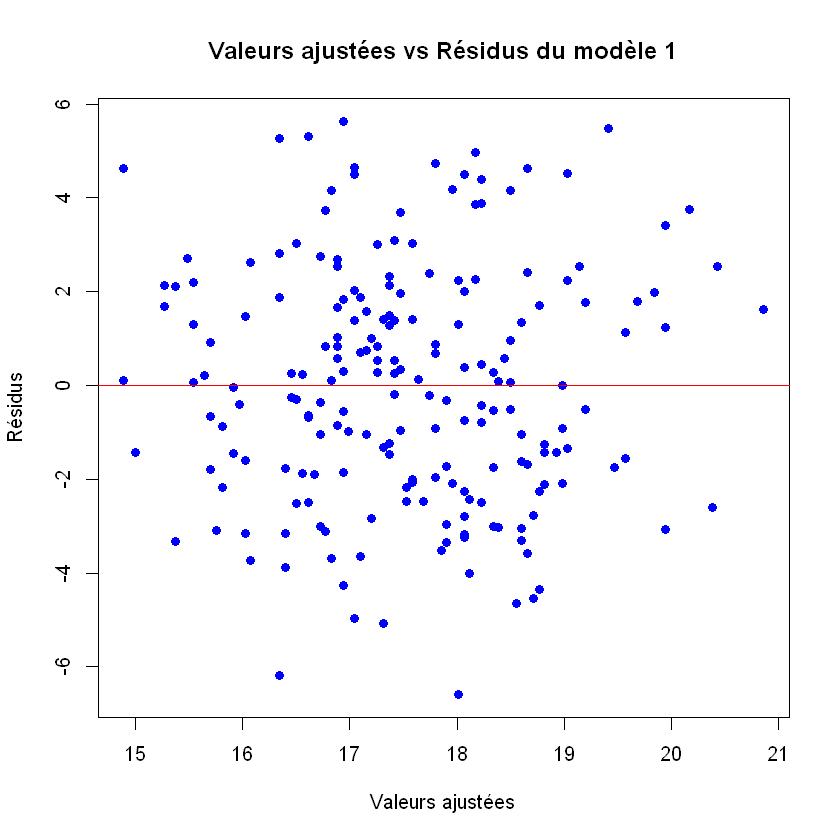

In [61]:
plot(fitted(modele1), residusModele1, main = "Valeurs ajustées vs Résidus du modèle 1", 
xlab = "Valeurs ajustées", 
ylab = "Résidus", 
pch = 19, 
col = "blue")
abline(h = 0, col = "red")

Pour évaluer l'homoscédasticité, nous devons regarder le graphique ci-dessus et, selon la forme que les points ont, nous pouvons déterminer si le modèle fait preuve d'homoscédasticité ou non, donc d'hétéroscédasticité. Si les points semblent avoir été placés de façon aléatoire, qu'il n'y ait pas croissance ou décroissance, nous pouvons conclure que le modèle fait preuve d'homoscédasticité, ce qui le cas pour le modèle 1.

- Points atypiques

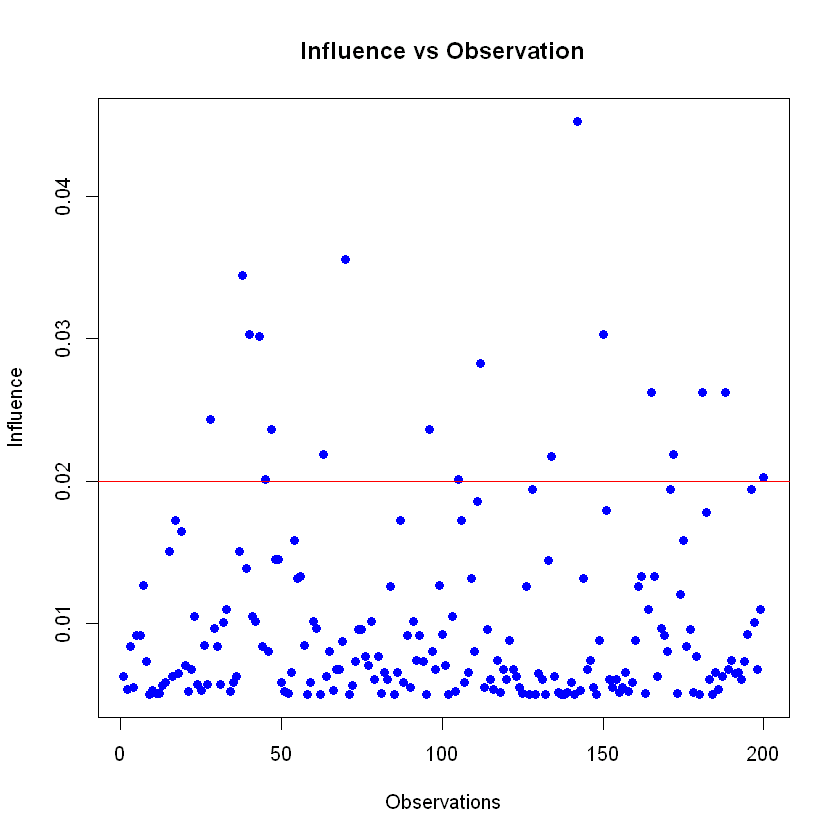

In [76]:
plot(hatvalues(modele1), main = "Influence vs Observation",
xlab = "Observations",
ylab = "Influence",
pch = 19,
col = "blue")
abline(h = 2 * mean(hatvalues(modele1)), col = "red")

Ce graphique nous permet d'évaluer l'influence que chaque point a sur les résultats de notre modèle, plus les points sont regroupés en termes d'influence que chacun possède, mieux c'est, puisque cela indique qu'il n'y a pas de points si en dehors du lot qu'ils peuvent impacter le reste des données.

Dans notre cas, nous avons quelques points ayant une influence plus grande que les autres, mais pas assez pour que ça pose un réel problème.À

c) Intervalle de confiance, avec un taux de confiance de 0.95, autrement dit, un seuil critique de 0.05.

In [68]:
confint(modele1)

,2.5 %,97.5 %
(Intercept),21.86975473,25.76875358
Price,-0.07016598,-0.03738455


- Modèle 2


Y : Ventes

X2 : Âge

In [40]:
modele2 <- lm(Sales ~ Age, data = data)

b) Signification du modèle

- p-value et R^2

In [69]:
summary(modele2)


Call:
lm(formula = Sales ~ Age, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7671 -1.8342 -0.2574  1.7464  7.3739 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.92998    0.66259  30.079  < 2e-16 ***
Age         -0.04452    0.01177  -3.783 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.727 on 198 degrees of freedom
Multiple R-squared:  0.06741,	Adjusted R-squared:  0.0627 
F-statistic: 14.31 on 1 and 198 DF,  p-value: 0.0002052


p-value = 0.0002052

Seulement avec p-value, nous pouvons dire que le modèle est significatif, il représente bien les valeurs qu'il représente.

R^2 = 0.06741

Par contre, avec la valeur de R^2, nous pouvons constater que le modèle couvre une infime partie des données, bien qu'elles soit très bien représentées.

- Normalité

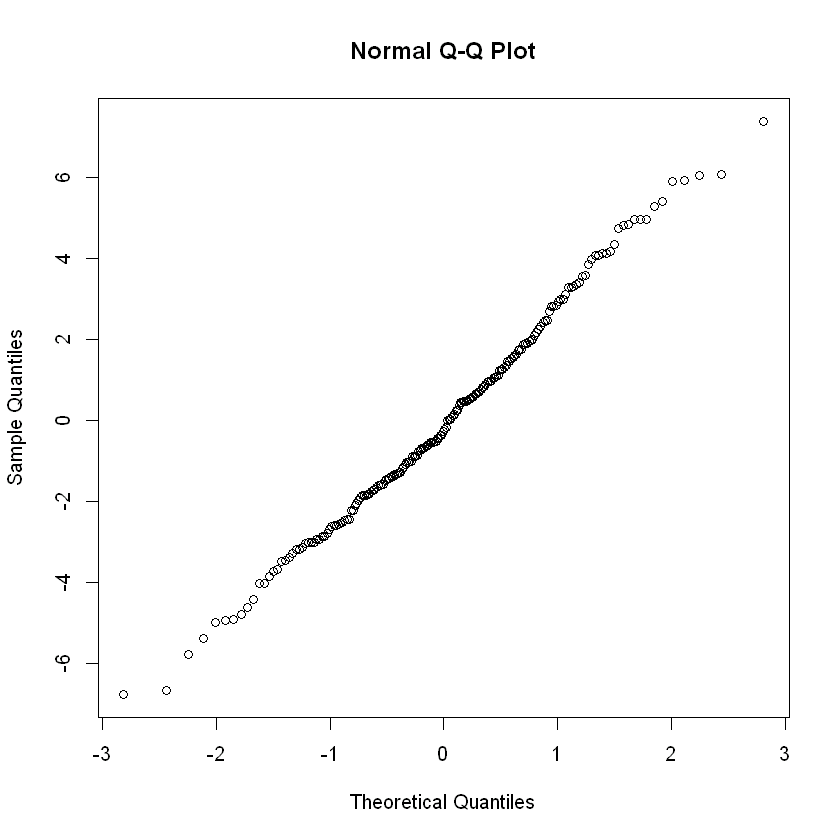

In [73]:
residusModele2 <- residuals(modele2)
qqnorm(residusModele2)

Avec ce graphique, nous pouvons conclure que les résidus sont distribués normalement, puisqu'ils sont tous, ou presque, sur la même droite.

- Homscédasticité

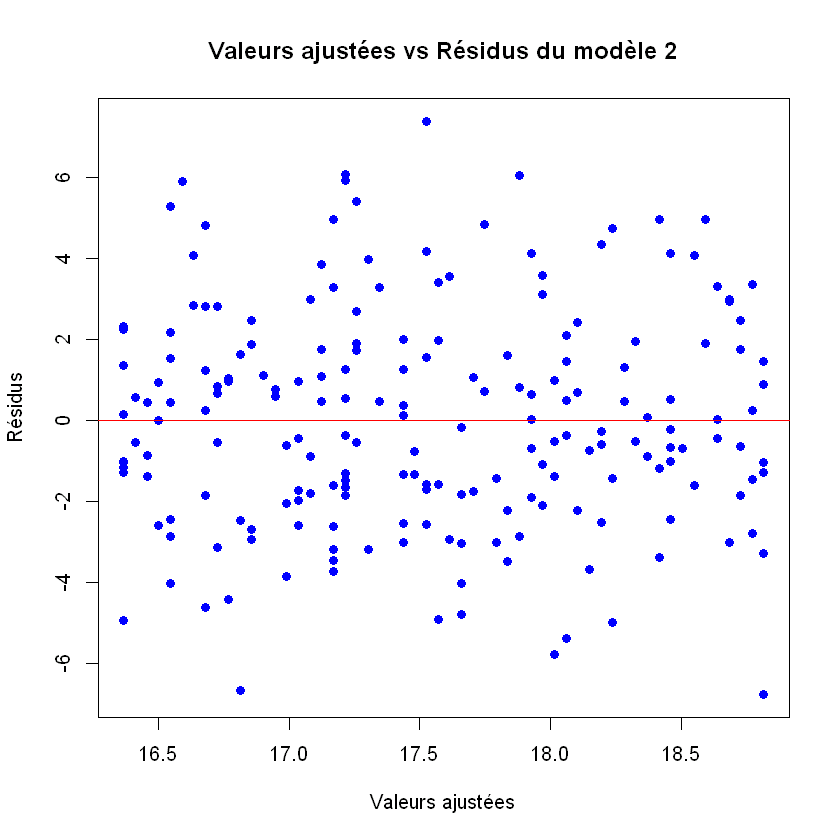

In [77]:
plot(fitted(modele2), residusModele2, main = "Valeurs ajustées vs Résidus du modèle 2", 
xlab = "Valeurs ajustées", 
ylab = "Résidus", 
pch = 19, 
col = "blue")
abline(h = 0, col = "red")

Puisque tous les points sont distribués de façon aléatoire, nous pouvons dire que le modèle fait preuve d'homoscédasticité.

- Points atypiques

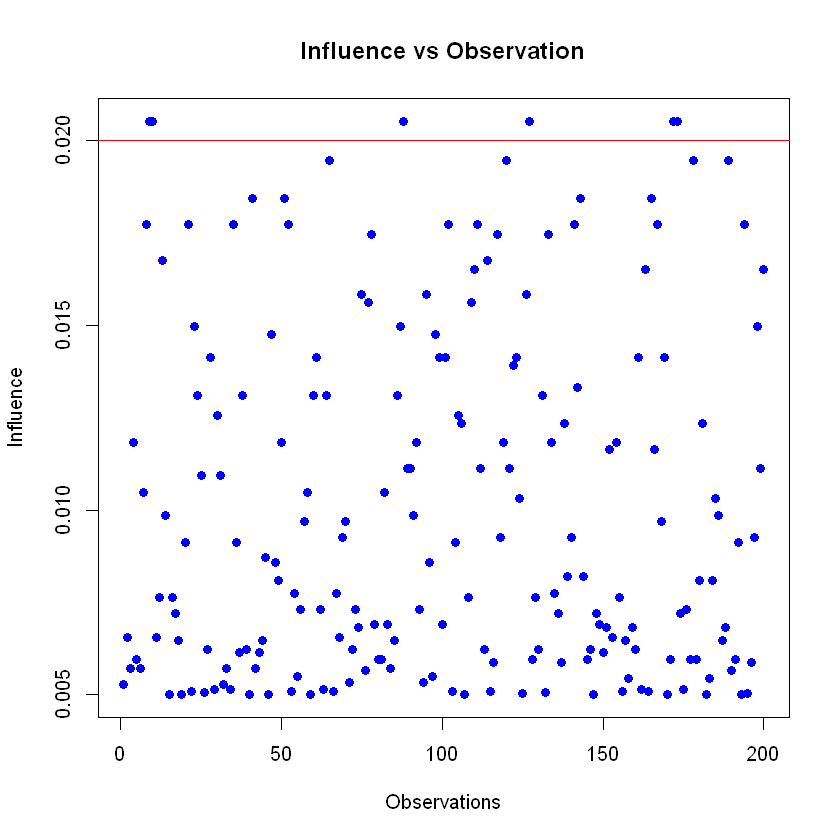

In [78]:
plot(hatvalues(modele2), main = "Influence vs Observation",
xlab = "Observations",
ylab = "Influence",
pch = 19,
col = "blue")
abline(h = 2 * mean(hatvalues(modele2)), col = "red")

Selon ce graphique, nous pouvons conclure qu'il y a beaucoup de points qui ont trop d'influence sur le reste des données.

c) Intervalle de confiance à 95%

In [79]:
confint(modele2)

,2.5 %,97.5 %
(Intercept),18.62334492,21.23660590
Age,-0.06772262,-0.02131118


- Modèle 3 

Y : Ventes

X1 : Prix

In [81]:
modele3 <- lm(Sales ~ I(Price^2), data = data)

b) Signification du modèle

- p-value et R^2

In [82]:
summary(modele3)


Call:
lm(formula = Sales ~ I(Price^2), data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-6.667 -1.966  0.044  1.911  5.708 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.070e+01  5.405e-01  38.288  < 2e-16 ***
I(Price^2)  -2.236e-04  3.596e-05  -6.218 2.93e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.582 on 198 degrees of freedom
Multiple R-squared:  0.1634,	Adjusted R-squared:  0.1591 
F-statistic: 38.66 on 1 and 198 DF,  p-value: 2.932e-09


p-value = 2.932 * 10^-9

R^2 = 0.1634

Comme pour le modèle 1, nous pouvons dire de ce modèle qu'il est significatif mais représente une petite partie des données.

- Normalité

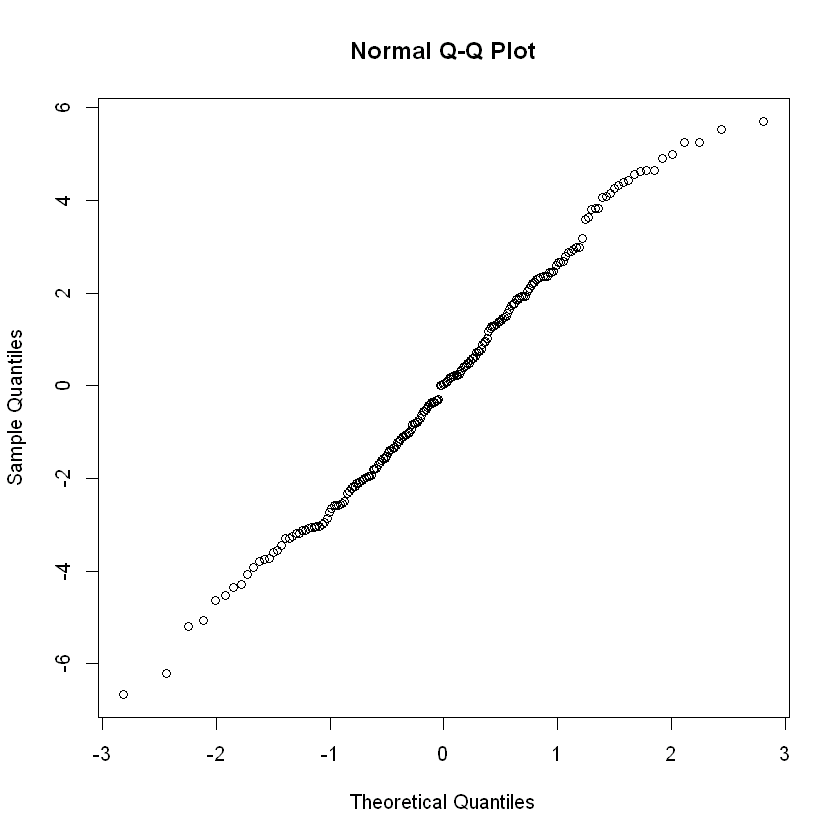

In [83]:
residusModele3 <- residuals(modele3)
qqnorm(residusModele3)

Nous pouvons constater que les points sont presque tous sur la même droite, avec quelques points plus loin des autres, contrairement au modèle 1 dont les points étaient plus condensés.

- Homoscédasticité

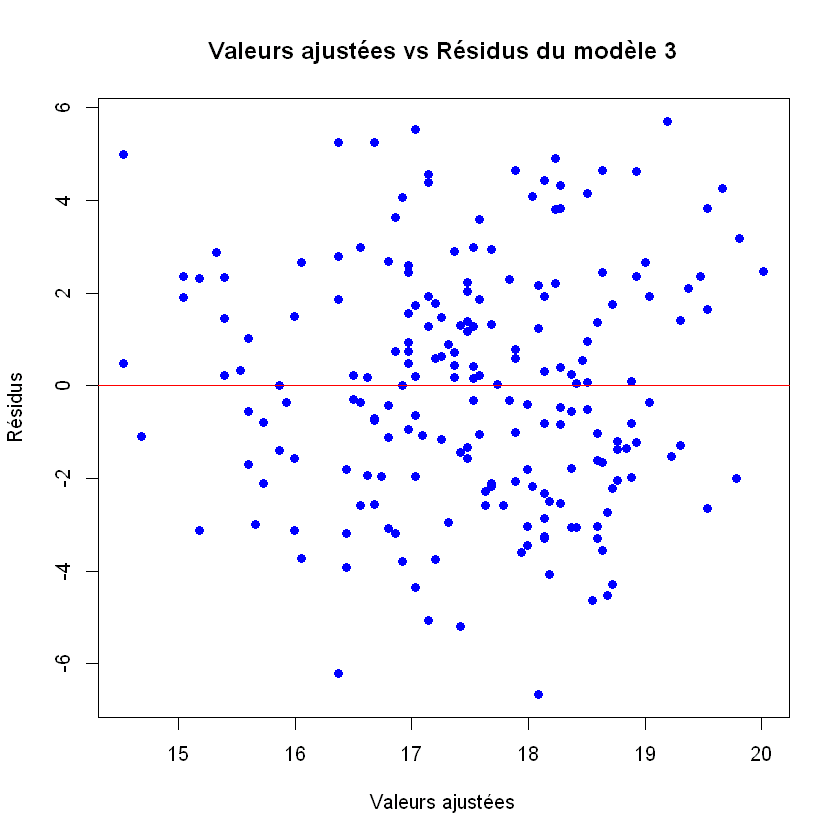

In [84]:
plot(fitted(modele3), residusModele3, main = "Valeurs ajustées vs Résidus du modèle 3", 
xlab = "Valeurs ajustées", 
ylab = "Résidus", 
pch = 19, 
col = "blue")
abline(h = 0, col = "red")

Les points sont plus ou moins placés de façon aléatoire, mais nous pouvons remarquer que la plupart des points se situent au centre du graphique.

- Points atypiques

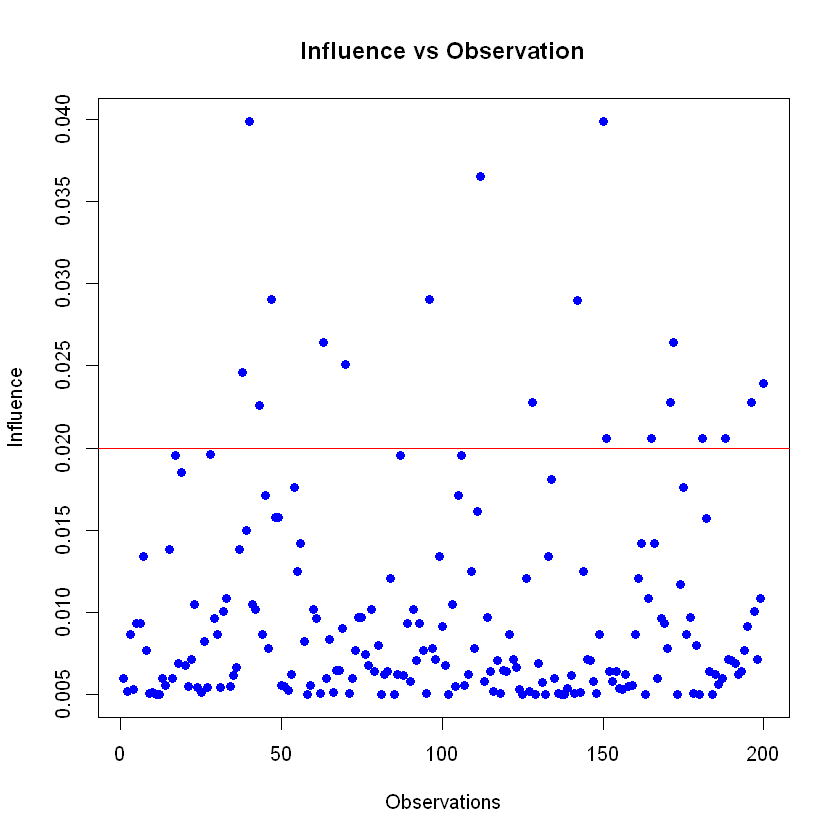

In [85]:
plot(hatvalues(modele3), main = "Influence vs Observation",
xlab = "Observations",
ylab = "Influence",
pch = 19,
col = "blue")
abline(h = 2 * mean(hatvalues(modele3)), col = "red")

Puisque la plupart des points se trouvent au même endroit, nous pouvons dire que les points ont, pour la plupart, la même influence sur le reste des données, mais, contrairement au modèle 1, plus de points ont plus d'influence que les autres; le modèle 1, quant à lui, avait encore plus de ses points au même endroit dans le graphique.

c) Intervalle de confiance à 95%

In [86]:
confint(modele3)

,2.5 %,97.5 %
(Intercept),19.6291636799,21.7609572030
I(Price^2),-0.0002945194,-0.0001526865


- Modele 4 


Y : Ventes


X2 : Âge

In [87]:
modele4 <- lm(Sales ~ I(Age^2), data = data)

b) Signification du modèle

- p-value et R^2

In [88]:
summary(modele4)


Call:
lm(formula = Sales ~ I(Age^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6551 -1.8718 -0.2916  1.7066  7.2627 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.8455960  0.3998071  47.137  < 2e-16 ***
I(Age^2)    -0.0004144  0.0001105  -3.752 0.000231 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.728 on 198 degrees of freedom
Multiple R-squared:  0.06636,	Adjusted R-squared:  0.06165 
F-statistic: 14.07 on 1 and 198 DF,  p-value: 0.0002308


p-value = 0.000 2308

R^2 = 0.06636

Une très petite partie des valeurs est assez bien représentée, moins bien que dans le cas des modèles 1 et 3, mais tout de même, p-value est bien en bas de 0.01, indiquant que le modèle est significatif.

- Normalité

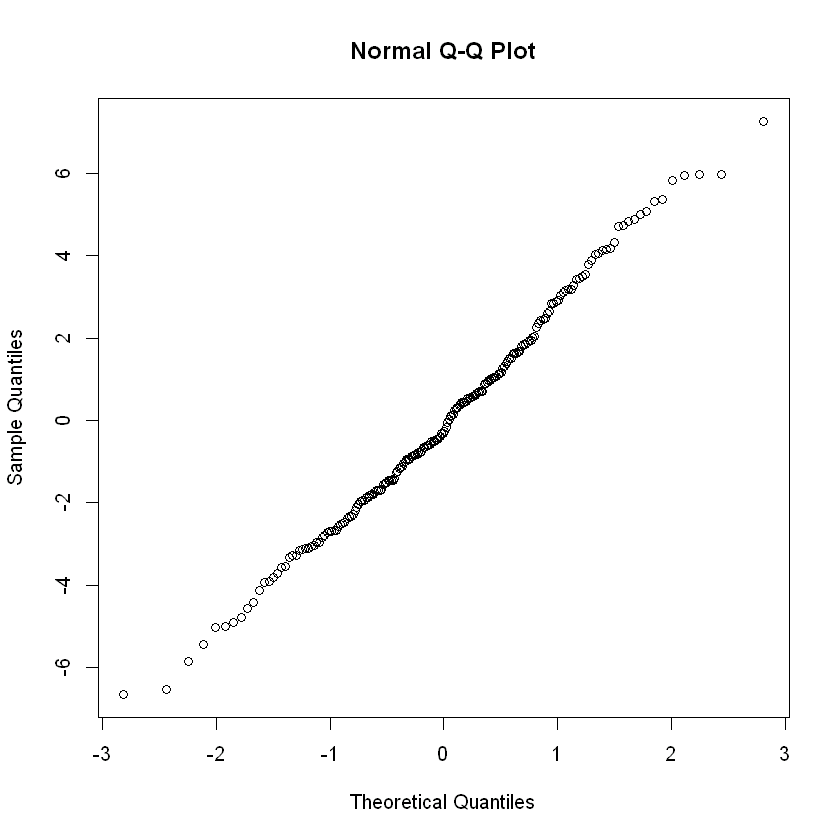

In [89]:
residusModele4 <- residuals(modele4)
qqnorm(residusModele4)

Encore une fois, la presque totalité des points se trouve sur la droite, indiquant qu'ils sont distribués normalement.

- Homoscédasticité

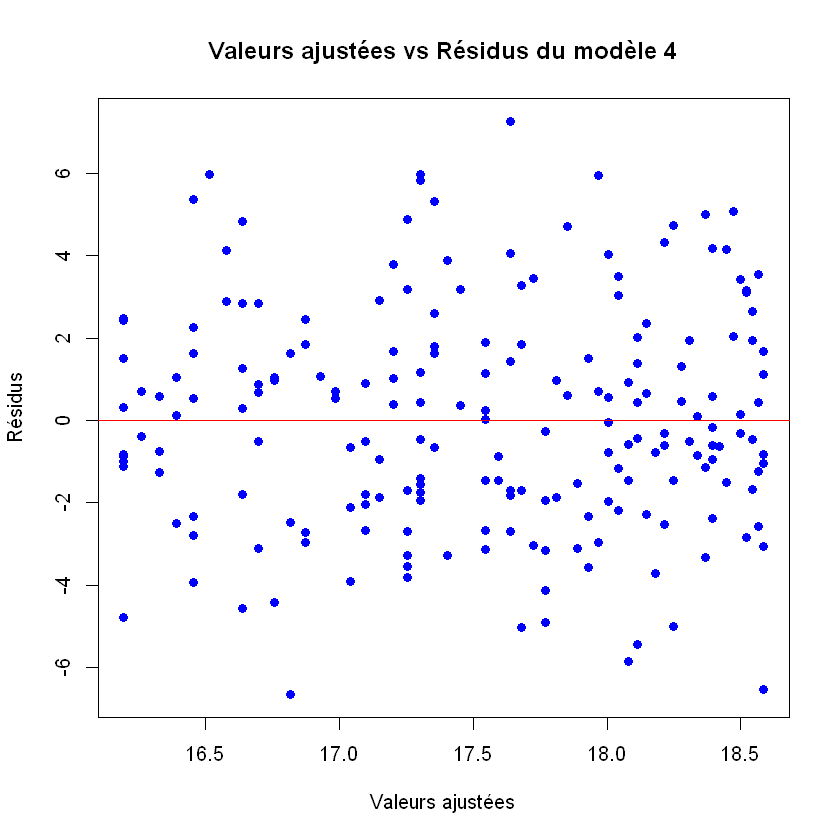

In [90]:
plot(fitted(modele4), residusModele4, main = "Valeurs ajustées vs Résidus du modèle 4", 
xlab = "Valeurs ajustées", 
ylab = "Résidus", 
pch = 19, 
col = "blue")
abline(h = 0, col = "red")

Les points sont distribués de façon plutôt aléatoire, mais ont une tout de même une tendance à être groupés, le modèle fait tout même preuve d'homoscédasticité, mais moins que les modèles précédents, en particulier, le modèle 2, celui qui utilise la même variable indépendante (Âge).

- Points atypiques

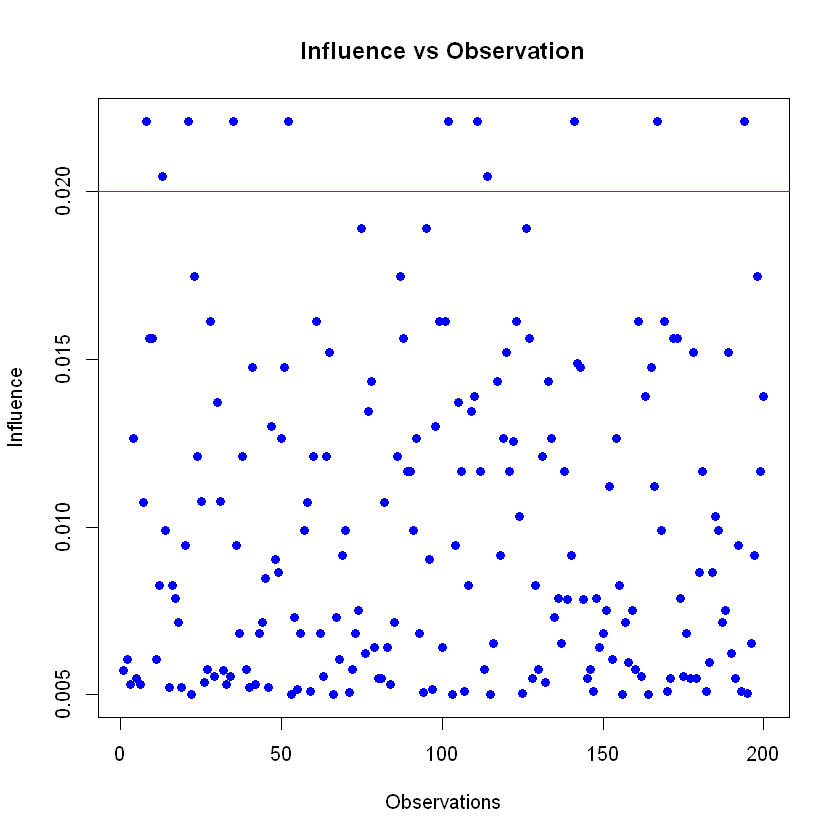

In [91]:
plot(hatvalues(modele4), main = "Influence vs Observation",
xlab = "Observations",
ylab = "Influence",
pch = 19,
col = "blue")
abline(h = 2 * mean(hatvalues(modele4)), col = "red")

Les points se trouvent trop éparpillés sur le graphe pour conclure que les points aient tous la même influence, nous pouvons aussi le voir avec la ligne rouge indiquant l'influence moyenne de chaque donnée. La ligne est très haute, et, en plus, la plupart des points se trouvent bien en-desssous d'elle, indiquant qu'une minorité de points a un plus gros impact que tous les autres.

c) Intervalle de confiance

In [92]:
confint(modele4)

,2.5 %,97.5 %
(Intercept),18.057169453,19.6340224633
I(Age^2),-0.000632198,-0.0001965567


- Modèle 5

Y : Ventes

X1 : Prix

In [43]:
modele5 <- lm(log(Sales) ~ Price, data = data)

b) Signification du modèle

- p-value et R^2

In [93]:
summary(modele5)


Call:
lm(formula = log(Sales) ~ Price, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46512 -0.10783  0.01018  0.10957  0.29947 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.2078190  0.0574813  55.806  < 2e-16 ***
Price       -0.0030521  0.0004833  -6.315 1.74e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1492 on 198 degrees of freedom
Multiple R-squared:  0.1677,	Adjusted R-squared:  0.1635 
F-statistic: 39.88 on 1 and 198 DF,  p-value: 1.74e-09


p-value = 1.74 * 10^-9

R^2 = 0.1677

Ce modèle est assez similaire aux modèles 1 et 3, la plus grande différence étant le fait que p-value est un peu plus grande dans ce cas-ci, donc, ce modèle est moins significatifs que les deux autres (Un peu moins significatif) et représente une petite partie de ses données.

- Normalité

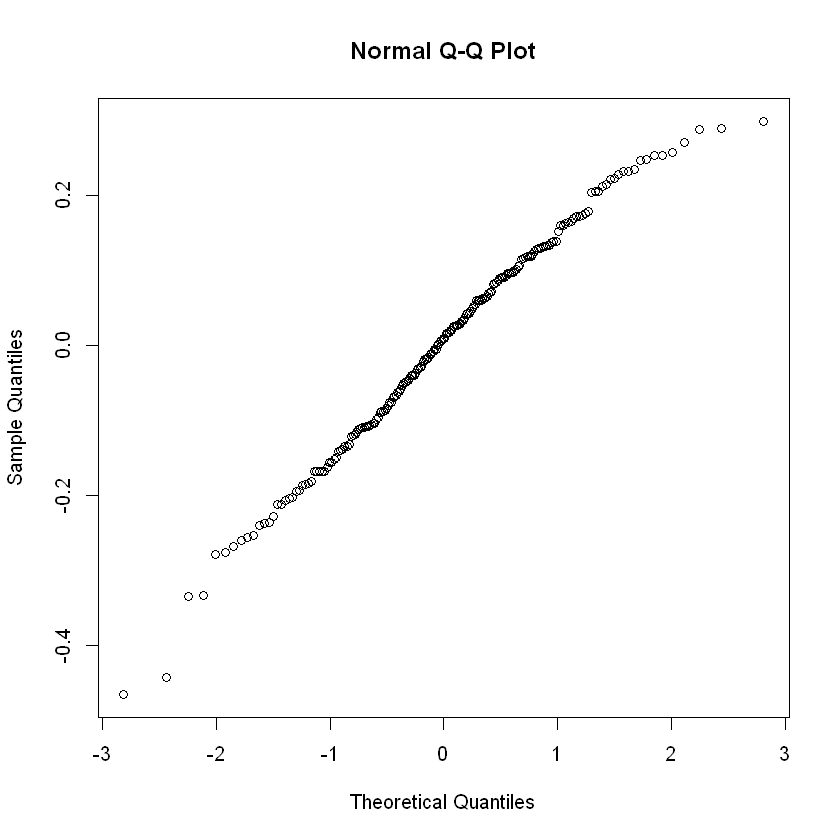

In [94]:
residusModele5 <- residuals(modele5)
qqnorm(residusModele5)

Beaucoup de points sont très bien groupés plus ou moins au même endroit sur la droite, mais, nous avons aussi plus de points qui sont mal placés sur la droite.

- Homoscédasticité

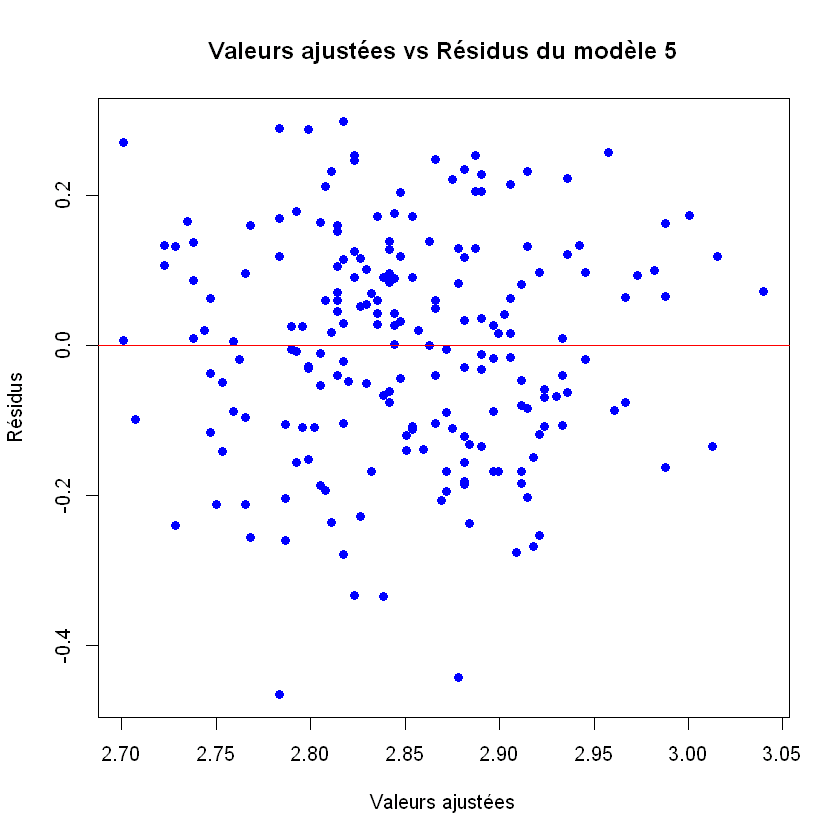

In [96]:
plot(fitted(modele5), residusModele5, main = "Valeurs ajustées vs Résidus du modèle 5", 
xlab = "Valeurs ajustées", 
ylab = "Résidus", 
pch = 19, 
col = "blue")
abline(h = 0, col = "red")

Ces valeurs sont plus ou moins distribuées de façon aléatoire, avec un regroupement assez concentré au centre du graphique, le modèle fait tout de même preuve d'homoscédasticité, bien que moins que les modèles 1 et 3.

- Points atypiques

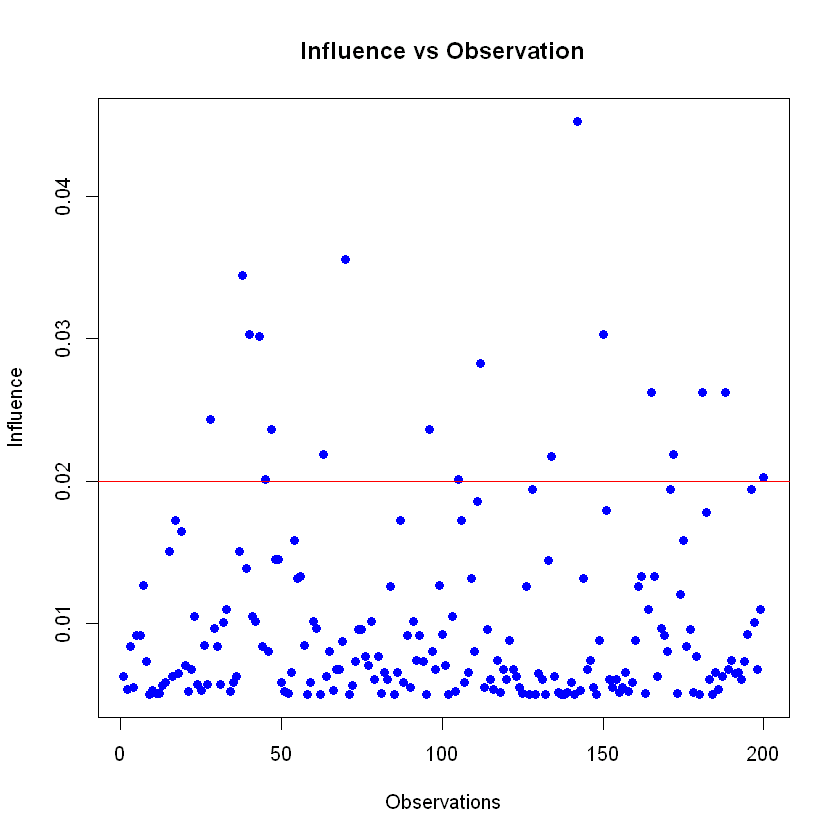

In [95]:
plot(hatvalues(modele5), main = "Influence vs Observation",
xlab = "Observations",
ylab = "Influence",
pch = 19,
col = "blue")
abline(h = 2 * mean(hatvalues(modele5)), col = "red")

En voyant l'emplacement de la moyenne de l'influence des points, nous pouvons constater que peu de points ont une trop grande influence, mais, la plupart des points ont la même influence.

c) Intervalle de confiance

In [97]:
confint(modele5)

,2.5 %,97.5 %
(Intercept),3.09446477,3.321173211
Price,-0.00400512,-0.002099034


- Modèle 6 

Y : Ventes

X2 : Âge

In [44]:
modele6 <- lm(log(Sales) ~ Age, data = data)

- Modèle 7

Y : Ventes

X1 : Prix

In [45]:
modele7 <- lm(log(Sales) ~ log(Price), data = data)

- Modèle 8

Y : Ventes

X2 : Âge

In [46]:
modele8 <- lm(log(Sales) ~ log(Age), data = data)